# 📊 Exploratory Data Analysis (EDA) - Pima Indians Diabetes Dataset


Bộ dữ liệu **Pima Indians Diabetes** được sử dụng rộng rãi trong nghiên cứu y học và trí tuệ nhân tạo.  
Theo các báo cáo kinh điển (WHO 1999【15†paper1.pdf】, NDDG 1979【17†paper3.pdf】), việc chẩn đoán và phân loại bệnh đái tháo đường dựa trên các đặc điểm lâm sàng, xét nghiệm đường huyết, và các yếu tố nguy cơ.  

Ngoài ra, nghiên cứu của Smith et al. (1988)【16†paper2.pdf】 đã áp dụng **mạng nơ-ron ADAP** để dự đoán nguy cơ mắc tiểu đường trên chính bộ dữ liệu này.  

Trong notebook này, chúng ta sẽ:  
1. Xác định tính chất dữ liệu  
2. Phân tích đơn biến  
3. Phân tích đa biến  
4. Xác định giá trị thiếu & mẫu bất thường  
5. Xác định ngoại lệ (outliers)  
6. Xử lý missing values và xuất bộ dữ liệu sạch  
    

## 1. Load dataset & Kiểm tra thông tin

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Đọc dữ liệu
file_path = "pima-indians-diabetes.csv"   # chỉnh lại nếu cần
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(file_path, header=None)
df.columns = columns

print("📌 Kích thước dữ liệu:", df.shape)
print(df.info())
df.head()


📌 Kích thước dữ liệu: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



👉 **Giải thích**:  
- Bộ dữ liệu gồm 768 dòng, 9 cột (8 đặc trưng + 1 nhãn `Outcome`).  
- Các biến như `Glucose`, `BloodPressure`, `BMI` liên quan trực tiếp đến tiêu chuẩn chẩn đoán tiểu đường do WHO và NDDG đề xuất.  
- `Outcome = 1` nghĩa là bệnh nhân mắc tiểu đường, `0` là không mắc.  
    

## 2. Kiểm tra giá trị thiếu

In [2]:

zero_as_missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("📌 Số lượng giá trị 0 (coi là missing):")
for c in zero_as_missing_cols:
    print(f"{c}: {(df[c]==0).sum()}")

# Thay 0 bằng NaN
df2 = df.copy()
for c in zero_as_missing_cols:
    df2[c] = df2[c].replace(0, np.nan)

print("\n📌 Missing values sau khi thay 0 -> NaN:")
print(df2.isnull().sum())

df2.describe()


📌 Số lượng giá trị 0 (coi là missing):
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

📌 Missing values sau khi thay 0 -> NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



👉 **Giải thích**:  
- Trong dữ liệu, một số cột có giá trị `0` không hợp lý về mặt y học (ví dụ: Glucose = 0).  
- Theo chuẩn chẩn đoán WHO【15†paper1.pdf】, glucose máu lúc đói ≥ 7.0 mmol/L (126 mg/dL) mới chẩn đoán là đái tháo đường → không thể có giá trị 0.  
- Do đó, ta coi các giá trị 0 là **missing** và thay bằng `NaN`.  
    

## 3. Phân tích đơn biến (Univariate Analysis)

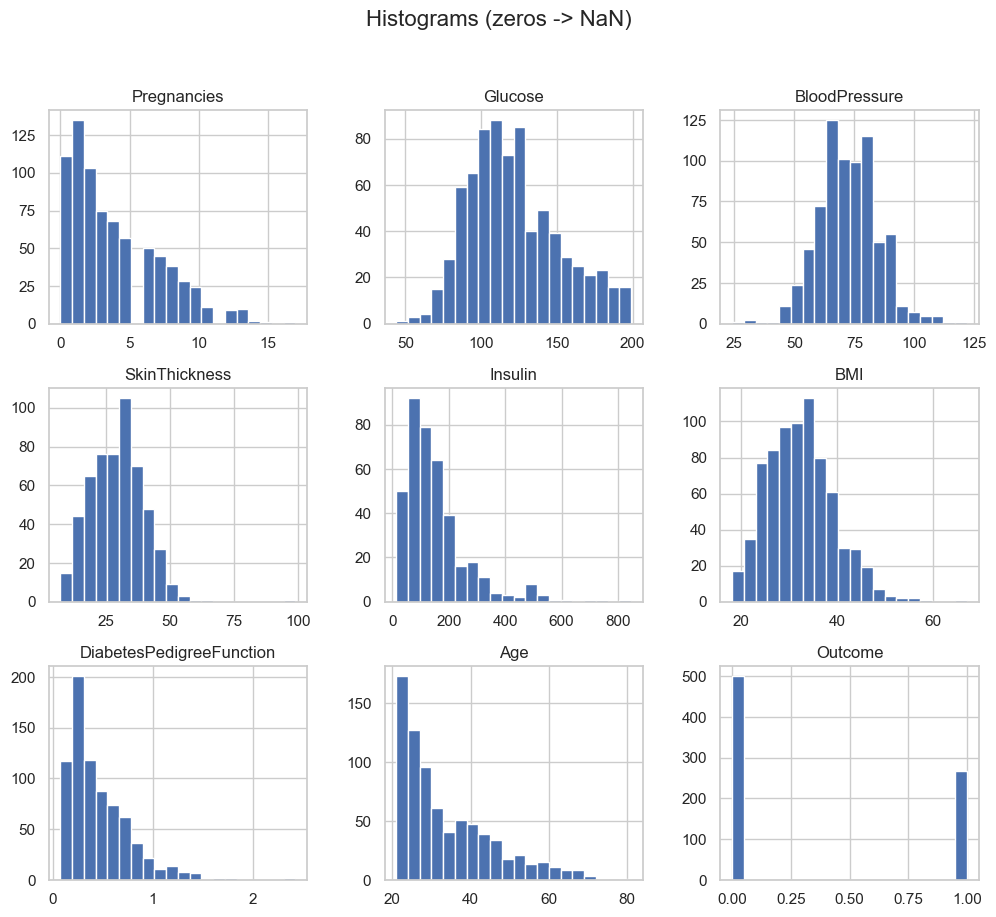

In [3]:

df2.hist(bins=20, figsize=(12,10))
plt.suptitle("Histograms (zeros -> NaN)", fontsize=16)
plt.show()



👉 **Giải thích**:  
- Histogram cho thấy phân phối của từng biến.  
- Các biến như `Age`, `Pregnancies`, `BMI` có phân phối lệch phải.  
- Đây là thông tin quan trọng để xác định ngưỡng bất thường và thiết kế mô hình dự đoán.  
    

## 4. Phân tích đa biến (Multivariate Analysis)

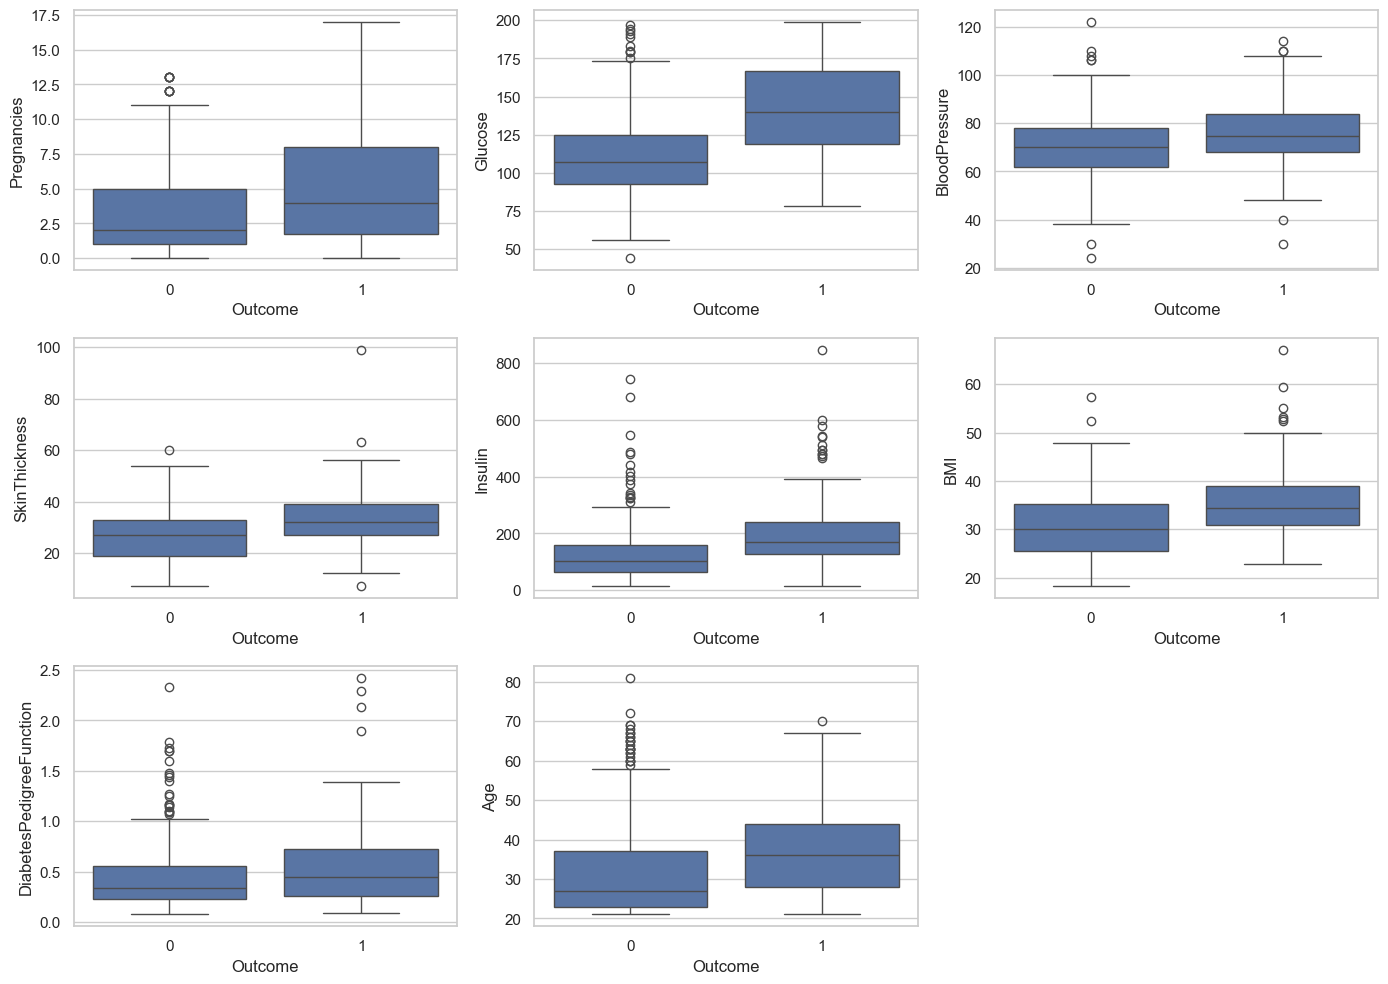

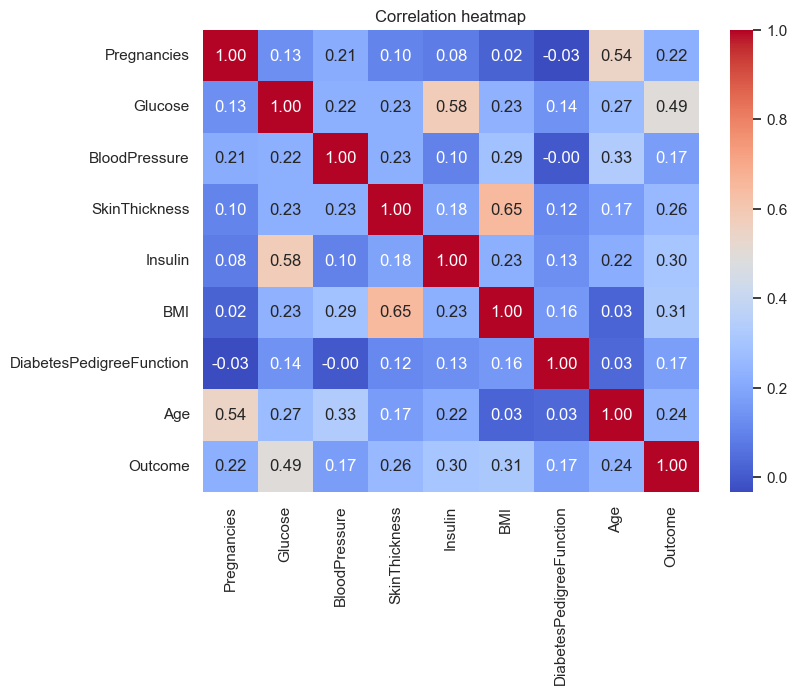

In [4]:

# Boxplot theo Outcome
plt.figure(figsize=(14,10))
num_cols = [c for c in df2.columns if c!="Outcome"]
for i, c in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df2, x="Outcome", y=c)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()



👉 **Giải thích**:  
- Boxplot giúp so sánh phân phối các biến giữa nhóm mắc và không mắc tiểu đường.  
- Correlation heatmap cho thấy **Glucose** có tương quan cao nhất với `Outcome`, phù hợp với tiêu chuẩn chẩn đoán y tế.  
- Các yếu tố như tuổi và BMI cũng là nguy cơ cao (theo WHO【15†paper1.pdf】 và NDDG【17†paper3.pdf】).  
    

## 5. Phát hiện ngoại lệ (Outlier Detection - IQR)

In [5]:

def detect_outliers_iqr(series):
    s = series.dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), lower, upper

for c in num_cols:
    n_out, lo, up = detect_outliers_iqr(df2[c])
    print(f"{c}: {n_out} ngoại lệ (ngưỡng < {lo:.2f} hoặc > {up:.2f})")


Pregnancies: 4 ngoại lệ (ngưỡng < -6.50 hoặc > 13.50)
Glucose: 0 ngoại lệ (ngưỡng < 36.00 hoặc > 204.00)
BloodPressure: 14 ngoại lệ (ngưỡng < 40.00 hoặc > 104.00)
SkinThickness: 3 ngoại lệ (ngưỡng < 1.00 hoặc > 57.00)
Insulin: 24 ngoại lệ (ngưỡng < -94.38 hoặc > 360.62)
BMI: 8 ngoại lệ (ngưỡng < 13.85 hoặc > 50.25)
DiabetesPedigreeFunction: 29 ngoại lệ (ngưỡng < -0.33 hoặc > 1.20)
Age: 9 ngoại lệ (ngưỡng < -1.50 hoặc > 66.50)



👉 **Giải thích**:  
- Phát hiện ngoại lệ bằng phương pháp **IQR (Interquartile Range)**.  
- Ví dụ: `Insulin` có nhiều giá trị cực đoan → cần xem xét vì có thể là lỗi nhập liệu hoặc phản ánh phân phối thật.  
- Trong thực hành lâm sàng, WHO【15†paper1.pdf】 cũng khuyến cáo kiểm tra nhiều lần trước khi kết luận giá trị bất thường.  
    

## 6. Xử lý missing values (Imputation)

In [6]:

df_imputed = df2.copy()
for c in zero_as_missing_cols:
    median_val = df_imputed[c].median()
    df_imputed[c] = df_imputed[c].fillna(median_val)
    print(f"Imputed {c} with median = {median_val:.2f}")

print("\n📌 Missing values sau imputation:")
print(df_imputed.isnull().sum())

# Lưu file mới
df_imputed.to_csv("pima_clean_imputed.csv", index=False)
print("✅ Saved cleaned dataset to pima_clean_imputed.csv")


Imputed Glucose with median = 117.00
Imputed BloodPressure with median = 72.00
Imputed SkinThickness with median = 29.00
Imputed Insulin with median = 125.00
Imputed BMI with median = 32.30

📌 Missing values sau imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
✅ Saved cleaned dataset to pima_clean_imputed.csv



👉 **Giải thích**:  
- Dùng **median imputation** để thay thế giá trị thiếu, nhằm giảm ảnh hưởng của outliers.  
- Dataset sạch này có thể dùng để huấn luyện mô hình dự đoán như **logistic regression** hoặc **neural networks** (ví dụ ADAP【16†paper2.pdf】).  
    

# 7. Phân bố Outcome


C:\Users\hienm\AppData\Local\Temp\ipykernel_22656\3989142145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x="Outcome", palette="Set2")


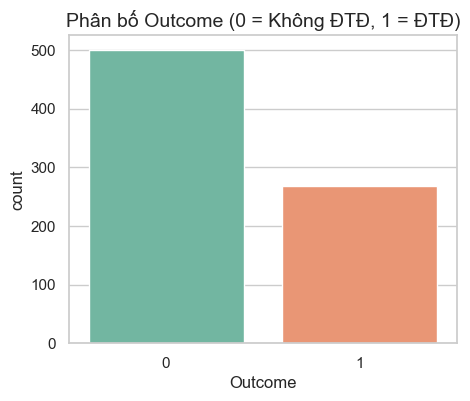

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(data=df2, x="Outcome", palette="Set2")
plt.title("Phân bố Outcome (0 = Không ĐTĐ, 1 = ĐTĐ)", fontsize=14)
plt.show()

# 8. So sánh phân phối Glucose và BMI theo Outcome


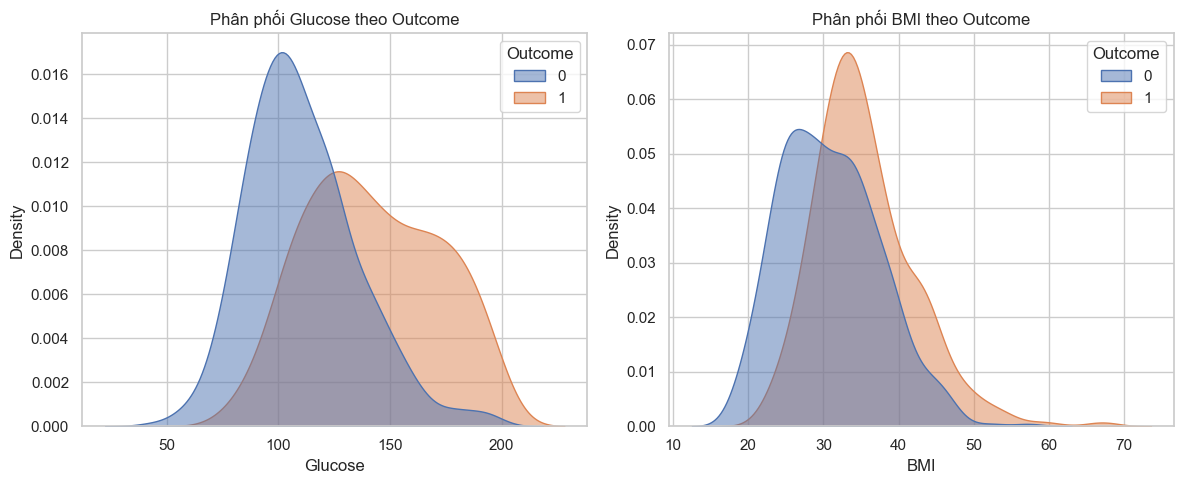

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df2, x="Glucose", hue="Outcome", fill=True, common_norm=False, alpha=0.5)
plt.title("Phân phối Glucose theo Outcome")

plt.subplot(1,2,2)
sns.kdeplot(data=df2, x="BMI", hue="Outcome", fill=True, common_norm=False, alpha=0.5)
plt.title("Phân phối BMI theo Outcome")

plt.tight_layout()
plt.show()

# 9. Scatter plot Glucose vs Age theo Outcome


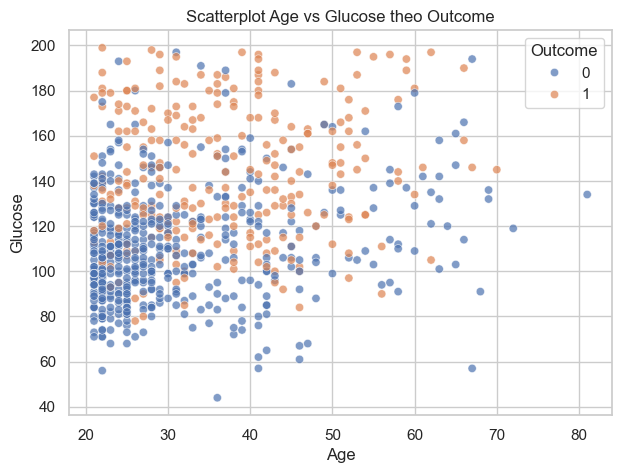

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2, x="Age", y="Glucose", hue="Outcome", alpha=0.7)
plt.title("Scatterplot Age vs Glucose theo Outcome")
plt.show()

# 10. Pairplot cho vài biến chính


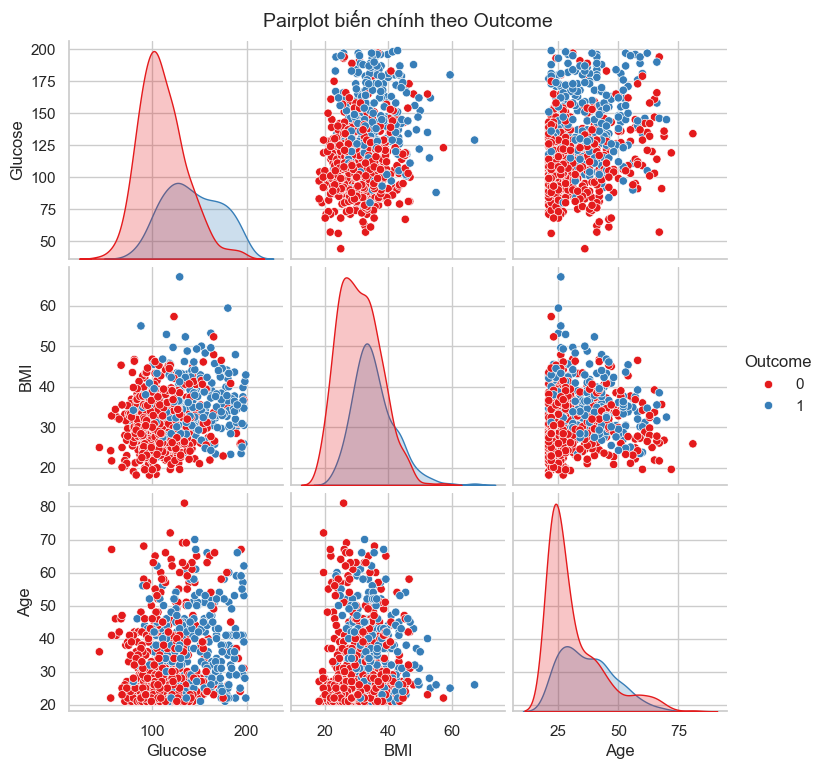

In [10]:
sns.pairplot(df2[["Glucose", "BMI", "Age", "Outcome"]], hue="Outcome", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot biến chính theo Outcome", y=1.02, fontsize=14)
plt.show()